In [31]:
import mundi, mundi_demography as md
import numpy as np
import matplotlib.pyplot as plt

md.enable()

# Mundi Demography demonstration

Let us showcase how mundi-demography works and do some interesting data exploration with demographic information about Brazillian cities.

First, we start by loading all municipalities and their respective age pyramids.

In [116]:
cities = mundi.regions("BR", type="municipality")
ages = cities.mundi["age_pyramid"]

Next, we construct an histogram of population sizes. Since population varies widely between cities, it is preferable to use a log scale. We have São Paulo and a few capitals with millions of inhabitants and lots of small citites with really tiny populations. 

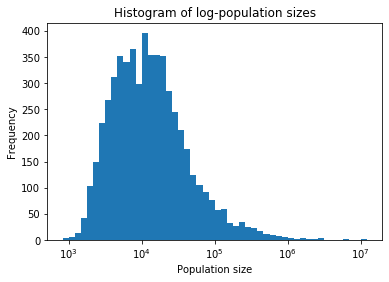

In [60]:
np.log10(ages.sum(1)).plot.hist(bins=50)
plt.title("Histogram of log-population sizes")
xticks = [f'$10^{int(n)}$' for n in plt.xticks()[0]]
plt.gca().set_xticklabels(xticks)
plt.xlabel('Population size')
plt.show()

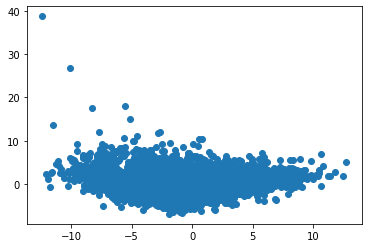

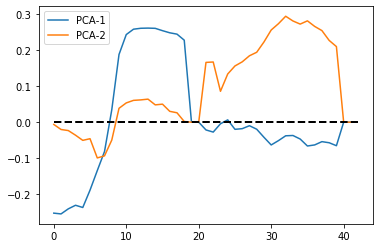

In [156]:
from sklearn.decomposition import PCA
# from sklearn.utils import whiten

e = 1e-50
n = ages.shape[1]
features = np.zeros(ages.shape)

X = (ages["male"] + ages["female"]).values / ages.sum(1).values[:, None]
X -= X.mean(0)
X /= X.std(0) + e

Y = ((ages["male"] + e) / (ages["female"] + e) - 1).values
Y /= Y.std(0) + e

features[:, :(n // 2)] = X
features[:, (n // 2):] = Y

pca = PCA(2)
data = pca.fit_transform(features)

plt.scatter(*data.T)
plt.show()

plt.plot(pca.components_[0], label='PCA-1')
plt.plot(pca.components_[1], label='PCA-2')
plt.plot([0, ages.shape[1]], [0, 0], 'k--', lw=2)
plt.legend()
plt.show()

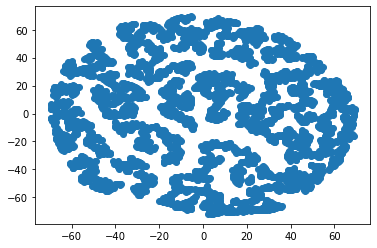

In [109]:
from sklearn.manifold import TSNE

tranform = TSNE(2)
data = tranform.fit_transform(data)

plt.scatter(*data.T)
plt.show()

## Sub-divisions

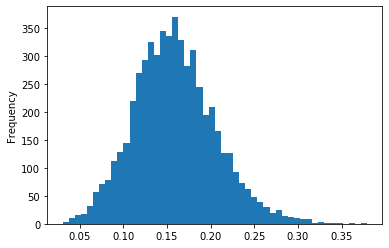

In [114]:
distrib = ages["male"] + ages["female"]
age60p = ages.loc[:, 60:].sum(1) / ages.sum(1)

age60p.plot.hist(bins=50)

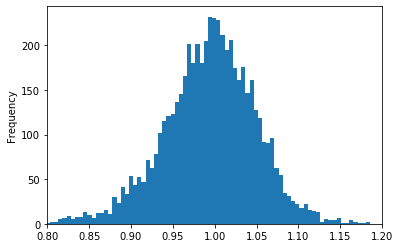

In [129]:
(ages["female"].sum(1) / ages["male"].sum(1)).plot.hist(bins=200, xlim=(0.8, 1.2))

In [160]:
thresh = 70
(ages["female"].loc[:, thresh:].sum(1) > ages["male"].loc[:, thresh:].sum(1)).mean()

0.8522441651705566

In [144]:
ages["male"].sum().sum(), ages["female"].sum().sum()

(103527792, 108227929)